# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


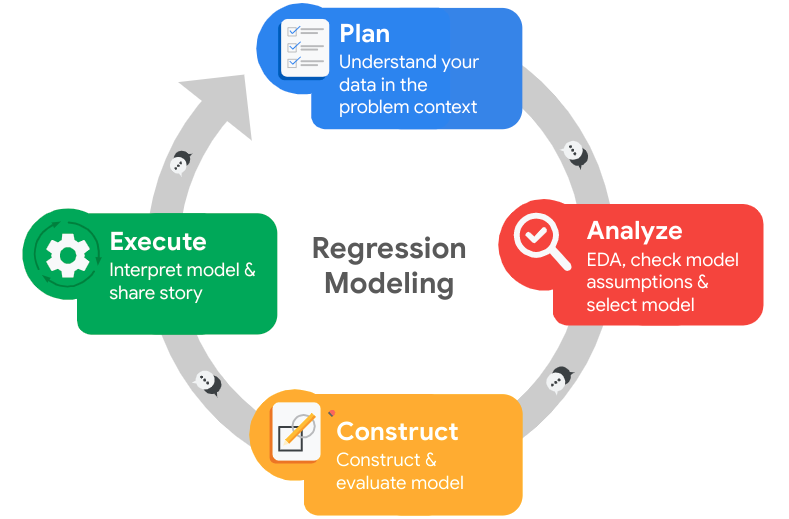

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders are members of the HR department of Sailfort Motors.

I am trying to build a model that can predict employess who are likely to quit and eventually possible factors that can lead to this. In this was, the HR department can take measures to reduce employee attrition.



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np  # for numerical operations
import pandas as pd # For  data manipulation
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler #To handle categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score   # To evaluate model
from sklearn.pipeline import Pipeline  #To build a modelling pipeline

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2.1. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
df0.shape #Returns a tuple (columns,rows)

(14999, 10)

In [4]:
# Gather basic information about the data
df0.info() #Display the column names, the data type for each column, the count of non null entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df0.isnull().sum() # to check the number of null values in each column

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There are no null values in our dataset. Great

### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df0.describe() # Provides a statistical summary of the numeric columns in the data set


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0 =df0.rename(columns ={'Work_accident': 'work_accident', 'time_spend_company':'tenure', 'Department':'department', 'average_montly_hours':'average_monthly_hours'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()


3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
df0[df0.duplicated()].shape[0]

3008

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

df1.shape
# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df11 = df0.drop_duplicates(keep = 'first') 
df11.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

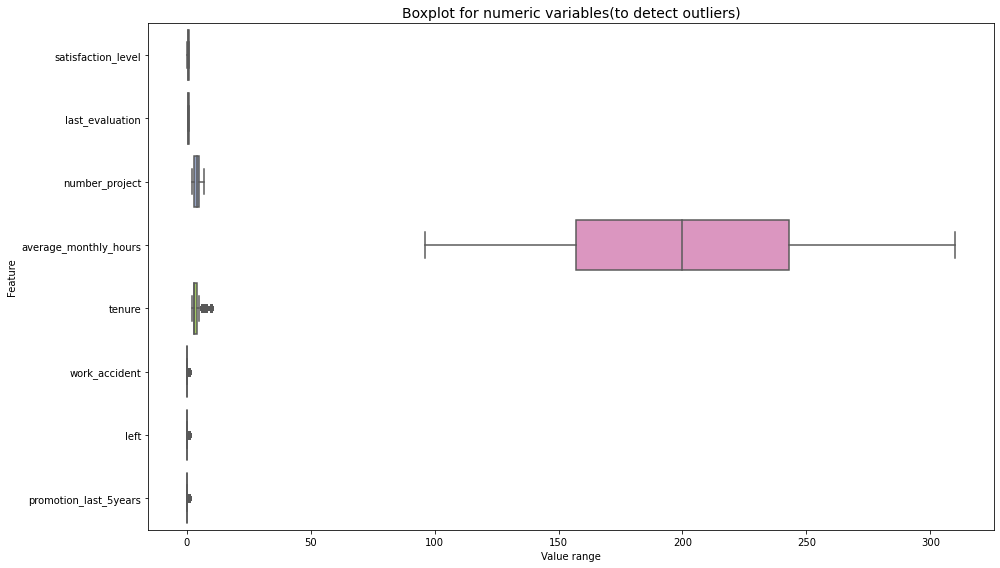

In [16]:
numeric_cols = df1.select_dtypes(include =['int64', 'float64']).columns.tolist()
plt.figure(figsize = (14,8))
sns.boxplot(data = df1[numeric_cols], orient = 'h', palette = 'Set2')
plt.title('Boxplot for numeric variables(to detect outliers)', fontsize=14)
plt.xlabel('Value range')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



What a Boxplot Shows (Reminder): For each variable:
	-	Box: The interquartile range (25th to 75th percentile)
	-	Line inside box: Median (50th percentile)
	-	Whiskers: Range of non-outlier values (within 1.5×IQR from the box)
	-	Dots outside whiskers: Outliers

Interpretation by Variable:

1. satisfaction_level, last_evaluation: Compact box indicating very few  outliers (if any)


2. number_project: No outliers from the plot
	
3. average_monthly_hours: Widest range of values. Visible no outliers 
		
4. tenure: some outliers at higher tenure 
	

5. work_accident, promotion_last_5years, left: These are binary variables (0 or 1), so the boxplot isn’t meaningful here.


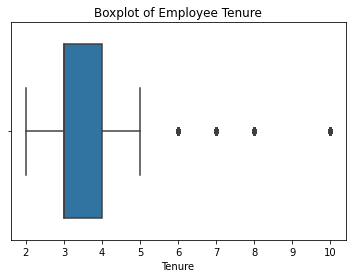

In [17]:
# Create a boxplot to visualize distribution of `tenure` to better visualize outliers
plt.figure(figsize =(6,4))
sns.boxplot(x=df1['tenure'])
plt.title('Boxplot of Employee Tenure')
plt.xlabel('Tenure')
plt.show()



We observe that there are actually some outliers in the tenure column.

In [18]:
# Determine the number of rows containing outliers
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3-Q1

#Define the bounds for the outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#Filter rows that are outliers
outliers = df1[(df1['tenure']<lower_bound) | (df1['tenure']>upper_bound)]

print('Number of outliers in tenure =', outliers.shape[0])



Number of outliers in tenure = 824


In [19]:
# Determine the number of rows containing outliers in average_monthly_hours. Just to confirm what we concluded from the boxplot
Q1 = df1['average_monthly_hours'].quantile(0.25)
Q3 = df1['average_monthly_hours'].quantile(0.75)
IQR = Q3-Q1
#Define the bounds for the outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#Filter rows that are outliers
outliers = df1[(df1['average_monthly_hours']<lower_bound) | (df1['average_monthly_hours']>upper_bound)]

print('Number of outliers in average_monthly_hours =', outliers.shape[0])



Number of outliers in average_monthly_hours = 0


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2.2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts().rename(index = {0:'stayed', 1:'left'})



stayed    10000
left       1991
Name: left, dtype: int64

In [21]:
# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize = True).rename(index = {0:'stayed', 1:'left'})*100

stayed    83.39588
left      16.60412
Name: left, dtype: float64

This shows our data is imbalance

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

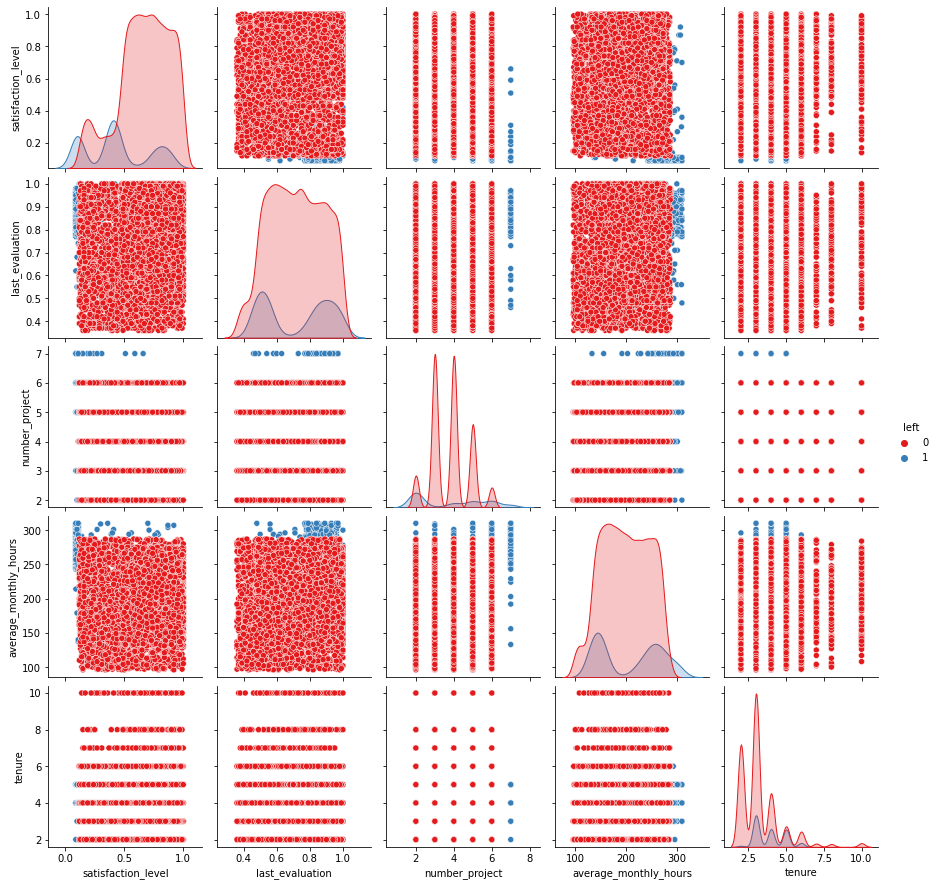

In [22]:
numeric_columns = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']
sns.pairplot(df1[numeric_columns + ['left']], hue ='left', palette='Set1', diag_kind='kde')
'''KDE stands for Kernel Density Estimation, and it’s a smoothed curve that shows the distribution of a numeric variable.'''

plt.show()

This matrix scatterplot visualizes the relationships between employee attributes and attrition status (left), and identify patterns that may influence employee turnover at Sailfort Motors.

Key Findings:

1. Satisfaction Level: Employees who left the company had significantly lower satisfaction scores.
	
2. Number of Projects: Attrition is common at very low (2) and very high (6–7) project counts.
	This Suggests that both underutilization and burnout may lead to resignations.

3. Average Monthly Hours: Employees who left tend to fall at the extremes (either working too few or too many hours).
	Indicates that imbalanced workloads could be a risk factor.

4. Tenure: The highest rate of attrition occurs between 3 to 4 years of tenure.
	This Suggests this may be a critical window for employee dissatisfaction, lack of advancement, or job change.

5. Last Evaluation; Red clusters (employees who left) are seen at both very low and very high evaluation scores.
Thsi coukd be because Poor performers may be let go, while high performers may leave voluntarily (possibly due to lack of recognition or better offers).

Conclusion:

The pair plot highlights satisfaction level, workload intensity (projects and hours), and mid-level tenure as strong drivers of attrition. These insights are valuable for:
	•	Targeted retention strategies
	•	Building predictive models
	•	HR policy optimization

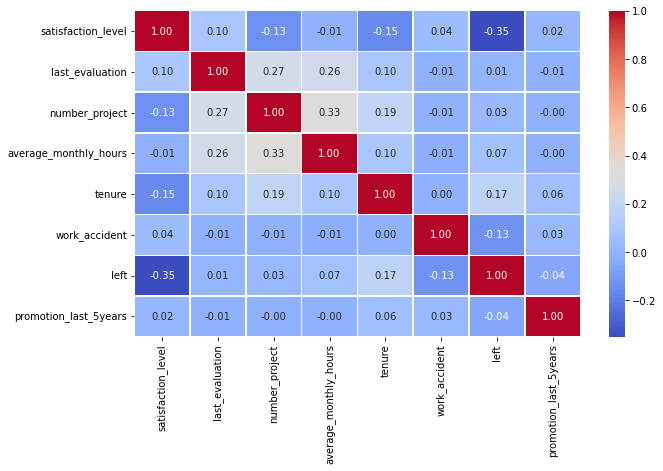

In [23]:
# Create a plot as needed
correlation_matrix = df1.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidth = 0.5)
plt.show()


A correlation Heatmap is used to evaluate how strongly each numeric variable is linearly related to the others, especially to the target variable left (employee attrition).

Key Insights from the Heatmap:

1. satisfaction_level and left(Correlation: -0.35): This is the strongest negative correlation in the heatmap.

Insight: Lower satisfaction significantly increases the likelihood of an employee leaving. A critical predictive feature.



2. promotion_last_5years and left(Correlation: -0.04): Very weak negative relationship.

Insight: Employees who were not promoted are only slightly more likely to leave; this variable may have limited predictive power on its own.


3. tenure and left(Correlation: -0.14): Mild negative correlation.

Insight: Employees with longer tenure are slightly less likely to leave. Attrition tends to happen earlier in tenure.


4. number_project, average_monthly_hours, last_evaluation(Correlations with left: +0.03, +0.02 and +0.01 respectively.

Insight: These are nearly uncorrelated with attrition linearly, but may still play a role in nonlinear patterns, as seen in scatter plots.


5. Relationships Between the otyer variables

 number_project and average_monthly_hours(correlation = +0.33):more projects often mean more hours worked.

-last_evaluation and number_project(correlation = 0.27): Employees with more projects tend to have higher evaluations.


Conclusion:

	•	satisfaction_level is the most important feature linearly related to attrition.
    
	•	tenure and promotion_last_5years show mild correlations.
    
	•	Other features might still be important in nonlinear models like decision trees or random forests.

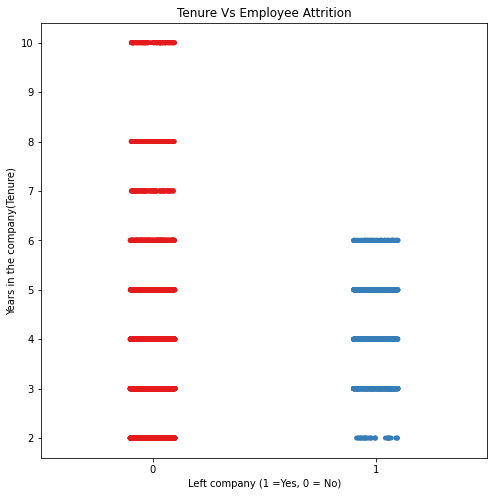

In [24]:
plt.figure(figsize =(8,8))
sns.stripplot(x='left', y ='tenure', data = df1, jitter = True, palette ='Set1')
plt.xlabel('Left company (1 =Yes, 0 = No)')
plt.ylabel('Years in the company(Tenure)')
plt.title('Tenure Vs Employee Attrition')
plt.show()

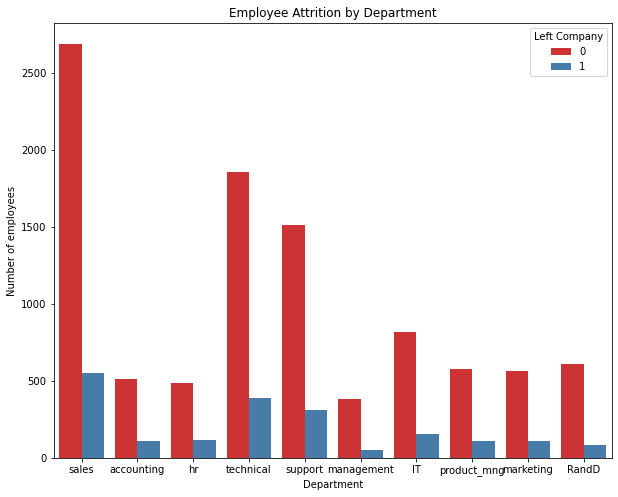

In [25]:
# Create a plot as needed
plt.figure(figsize = (10,8))
sns.countplot(x = 'department', hue = 'left', data = df1, palette = 'Set1')
'''A count plot is a type of bar chart provided by seaborn that shows the 
number of occurences of w=each category in a categorical variable (department)'''

'''The hue variable is added to display counts by a second grouping, (left)'''

'''This shows the departments on the x-axis and color the bars based on whether the employee left or stayed'''

'''palette is to define the colours'''
plt.title('Employee Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.legend(title = 'Left Company')
plt.show()


Key Insights by Department:

1. Sales
	- Highest number of employees overall
	- High attrition in absolute numbers, but retention (red) still dominates.
	- Suggests sales is a high-turnover but large department.

2. Technical & Support
     - Also show significant attrition.
     - Notably high blue bars. Could possible be due to burnout or job dissatisfaction in technical and support roles.

3. HR, Accounting, IT, RandD, and Marketing
	-	Smaller teams overall.
	-	Still some attrition, but red bars dominate, suggesting lower turnover rates in these departments.

4. Management
	-	Very low attrition (blue bar is tiny).
	-	Indicates high retention and possibly more job stability at higher levels.

Conclusion:
	- Departments with highest attrition: Sales, Technical, Support.
	- Lowest attrition: Management, HR, Accounting.
	- This plot suggests targeting employee engagement strategies in high-turnover departments like sales and technical support may improve overall retention.

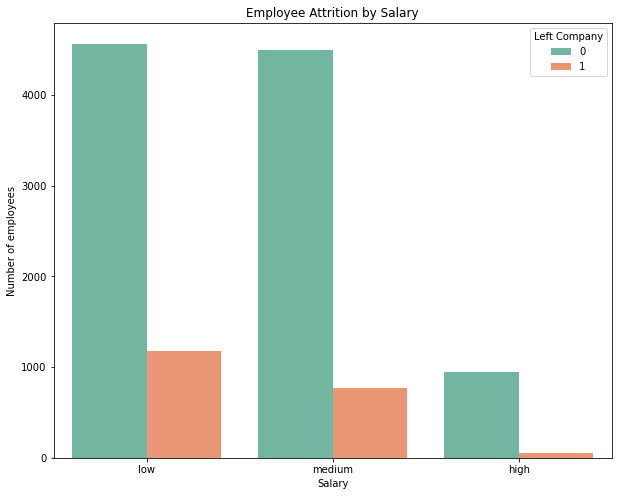

In [26]:
# Create a plot as needed
# Create a plot as needed
plt.figure(figsize = (10,8))
sns.countplot(x = 'salary', hue = 'left', data = df1, palette = 'Set2')
'''A count plot is a type of bar chart provided by seaborn that shows the 
number of occurences of w=each category in a categorical variable (department)'''

'''The hue variable is added to display counts by a second grouping, (left)'''

'''This shows the departments on the x-axis and color the bars based on whether the employee left or stayed'''

'''palette is to define the colours'''
plt.title('Employee Attrition by Salary')
plt.xlabel('Salary')
plt.ylabel('Number of employees')
plt.legend(title = 'Left Company')
plt.show()


Key Insights by Salary range

1. Low Salary
	-	Largest group of employees
	-	High number of leavers (orange bar is tall)
	-	Insight: Low salary is linked to higher attrition

2. Medium Salary
	-	Fewer employees than low salary
	-	Moderate number of leavers
	-	Insight: Slightly better retention than low salary group, but still notable attrition

3. High Salary
	-	Smallest group overall
	-	Very low attrition (tiny orange bar)
	-	Insight: High salaries are associated with very high retention

Conclusion

	•	Attrition decreases as salary increases
	•	Suggests that compensation is a key driver of employee retention
	•	Highlights the importance of salary reviews and adjustments in reducing turnover, especially among low and mid-tier earners

## Step 3. Model Building, Step 4. Results and Evaluation


### Identify the type of prediction task.

The prediction task in this project is a binary classification task.



### Identify the types of models most appropriate for this task.

### Modeling

We will build a logistic regression Model and a Random forest model to predict employee attrition


We will use a logistic regression model because the variable we want to predict (left) is a categorical variable ( precisely binary  : 1 for emplyee left and 0 for employee did not leave).

Logistic regression is sensitive to outliers. We had earlier detected outliers in the tenure. 
So we need to filter our these outliers before building our model.

In [27]:
#Remove outliers in tenure
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3-Q1

#Define the bounds for the outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#Filter out rows that are outliers
df2 = df1[(df1['tenure']>=lower_bound) & (df1['tenure']<=upper_bound)]

df2.shape

(11167, 10)

In [28]:
df1.shape

(11991, 10)

From the shape of df1 vs df2 we can confirm that the outliers have been filtered out

## Reminder: 
- df0 = original dataset, 
- df1 = dataset with duplicates dropped and 
- df2 = dataset with outliers filtered out

We now proceed to build our model using a clean dataset, df2

In [29]:
#Define out predictors and outcome variable
X = df2.drop('left', axis = 1) #predictors
y = df2['left'] #outcome



We have both numerical and cateforical variables(department(nominal) and salary(ordinal)).
we need to encode the categorical variables. We use OneHotEncoder for department and OrdinalEncoder for salary

In [30]:
categorical_nominal = ['department'] #unordered categories like sales, IT, HR
categorical_ordinal = ['salary'] #ordered categorires (low < medium < high)
ordinal_order = [['low','medium','high']]
numeric_cols = X.select_dtypes(include = ['int64','float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in categorical_ordinal]
#use transformer to handle encoding

preprocessor = ColumnTransformer([('onehot', OneHotEncoder(drop = 'first'), categorical_nominal), ('ordinal', OrdinalEncoder(categories =ordinal_order), categorical_ordinal)], remainder ='passthrough') 
#Encode categorical columns and keep numeric columns as they are
#OneHotEncoder converts into categorical variable into dummy variables
#OrdinalEncoder preserves the natural order (0 for low, 1 for medium, 2 for high)

In [31]:
pipeline = Pipeline([('prep', preprocessor), ('log_reg', LogisticRegression(max_iter=1000))])



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state =42) #split the data into training(80%) and testing(20%) sets 

In [33]:
pipeline.fit(X_train, y_train) # fit the model



Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehot',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['department']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                   

In [34]:

# Make predictions
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred) #initiate a confusion matrix


# Convert to labeled DataFrame
conf_matrix_df = pd.DataFrame(
    cm,
    index=['Actual: Stayed (0)', 'Actual: Left (1)'],
    columns=['Predicted: Stayed (0)', 'Predicted: Left (1)']
)

# labeled confusion matrix
print("Confusion Matrix:\n", conf_matrix_df)

# classification report and accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
                     Predicted: Stayed (0)  Predicted: Left (1)
Actual: Stayed (0)                   1739                  107
Actual: Left (1)                      285                  103

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1846
           1       0.49      0.27      0.34       388

    accuracy                           0.82      2234
   macro avg       0.67      0.60      0.62      2234
weighted avg       0.80      0.82      0.80      2234

Accuracy Score: 0.8245299910474485


1. True Positive (TP = 103): The model correctly predicted 103 employee who actually left as leavers

2. False Positive (FP = 107): The model incorrectly predicted that an employee would leave, but they actually stayed.
	
3. True Negative (TN = 1739): The model correctly predicted that an employee would stay, and they actually stayed.
	
4. False Negative (FN = 285): The model incorrectly predicted that an employee would stay, but they actually left.
	


With regards to employee attrition:
	-	TP: Good! You caught a potential leaver — you can intervene early.
	-	FP: Risk of wasting effort/resources trying to retain someone who wasn’t leaving.
	-	TN: Great! The model confirmed someone staying so no action needed.
	-	FN: Worst case! missed an actual leaver, which can cost the company in surprise turnover.

Interpretation of metrics
	-	Accuracy is relatively high (82.45%), meanwhile,
	-	Precision is moderate: when the model predicts an employee will leave, it’s correct about 49% of the time.
	-	Recall is low: the model only catches  about 27% of those who actually left, meaning it’s missing many real attrition cases.

This is common in imbalanced classification problems. As we had identified earlier, the dataset is imbalanced.

## Modeling Approach B: Random Forest.

In [58]:
#  Start everything afresh for our second model 
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Define feature matrix and target vector
X = df2.drop('left', axis=1)
y = df2['left']

# Identify column types
categorical_cols = ['department']                       # Nominal
ordinal_cols = ['salary']                               # Ordinal (low < medium < high)
numeric_cols = X.drop(columns=categorical_cols + ordinal_cols).columns.tolist()


In [61]:
# 3. Preprocessor: encode categorical + ordinal, pass numeric as-is
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), categorical_cols),
    ('ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ordinal_cols)
], remainder='passthrough')

In [62]:
# 4. Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [63]:
# 5. Hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],              # Number of trees in the forest
    'classifier__max_depth': [None, 5, 10],              # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5],             # Minimum number of samples to split a node
    'classifier__max_features': ['sqrt', 'log2']         # Number of features to consider when looking for the best split(sqr and loe base 2 of total features. These are common for classification problems)
}


- Random Forest builds multiple decision trees and aggregates their results. These values mean the model will try forests with 100 and 200 trees.

 - None: No limit on tree depth.
 - 5 and 10: The maximum depth the trees can grow to. Shallower trees are simpler and less likely to overfit.

- Minimum number of samples required to split an internal node.
 - 2 means a node must have at least 2 samples to split.
 - 5 makes the tree more conservative (fewer splits), potentially reducing overfitting.


- Number of features to consider when looking for the best split:
 - sqrt’: Square root of total features (common for classification).
 - ‘log2’: Log base 2 of total features.






In [67]:
# 6. Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 7. Grid search with cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1',                 # Refits the model using the best F1 score
    n_jobs=-1,
    verbose=1
)


Stratified K-Fold ensures that each fold of your cross-validation has approximately the same class distribution as the full dataset.
This is especially important in classification problems with imbalanced classes as it sets up a reliable and fair evaluation framework that:
- Maintains class balance across folds
- Shuffles data for randomness
- Repeats training/testing 5 times per model configuration




In [65]:
# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 9. Fit the grid search
grid_search.fit(X_train, y_train)

# 10. Output best parameters and cross-val score
print("Best Parameters:\n", grid_search.best_params_)
print("Best Cross-Validated F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.2min finished


Best Parameters:
 {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Cross-Validated F1 Score: 0.9498287603975534


In [66]:
# 11. Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Labeled confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix,
    index=['Actual: Stayed (0)', 'Actual: Left (1)'],
    columns=['Predicted: Stayed (0)', 'Predicted: Left (1)']
)

print("\nConfusion Matrix:\n", conf_df)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))



Confusion Matrix:
                     Predicted: Stayed (0)  Predicted: Left (1)
Actual: Stayed (0)                   2782                    4
Actual: Left (1)                       52                  513

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2786
           1       0.99      0.91      0.95       565

    accuracy                           0.98      3351
   macro avg       0.99      0.95      0.97      3351
weighted avg       0.98      0.98      0.98      3351

Test Set Accuracy: 0.9832885705759474


The model has a high accuracy of 98%. 

Top 10 Predictors of Employee Attrition:

                  Feature  Importance
10     satisfaction_level    0.321692
12         number_project    0.208456
14     time_spend_company    0.168588
13  average_monthly_hours    0.153761
11        last_evaluation    0.119268
15          Work_accident    0.006706
9                  salary    0.006447
8    department_technical    0.002349
6        department_sales    0.002336
7      department_support    0.001993


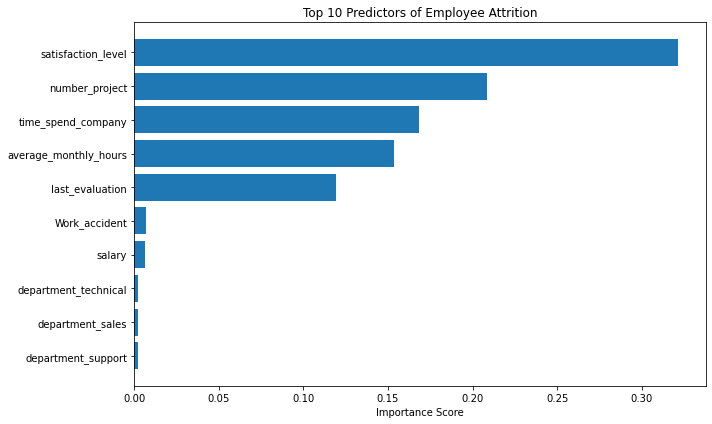

In [57]:
# Step 1: Get best model from GridSearchCV
best_model = grid_search.best_estimator_

# Step 2: Extract the classifier
rf_model = best_model.named_steps['classifier']

# Step 3: Get feature names after preprocessing
#   - Extract OneHotEncoder feature names
ohe = best_model.named_steps['preprocessing'].named_transformers_['onehot']
ohe_feature_names = ohe.get_feature_names(input_features=['department'])

#   - Combine all transformed features: one-hot + ordinal + numeric
ordinal_cols = ['salary']
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_monthly_hours', 'time_spend_company', 'Work_accident',
                'promotion_last_5years']  # Adjust if your numeric columns are different

all_feature_names = list(ohe_feature_names) + ordinal_cols + numeric_cols

# Step 4: Map feature importances
importances = rf_model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 5: Display top 10 features
print("Top 10 Predictors of Employee Attrition:\n")
print(feature_importance_df.head(10))

# Step 6: Optional - Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel('Importance Score')
plt.title('Top 10 Predictors of Employee Attrition')  # ← Fixed line
plt.tight_layout()
plt.show()


💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Key insights from the Random Forest algorithm

- Low satisfaction level is the strongest predictor of attrition.

- Employees with long working hours and no recent promotions are more likely to leave.

- Low salary levels are associated with higher turnover.

- Employees with high evaluations but low satisfaction are at risk of leaving due to potential lack of recognition.

## Recommendations
Based on the insights derived from the predictive model, the following strategic interventions are recommended:

- Enhance Job Satisfaction
 - Conduct satisfaction surveys and implement feedback mechanisms.

 - Encourage team-building and recognition programs.
 
- Monitor Workload
 - Identify and intervene in cases of excessive working hours.

 - Promote a culture of work-life balance.

- Develop Career Growth Plans
 - Offer internal mobility programs and upskilling opportunities.

 - Review promotion processes to ensure fairness and motivation.

- Review Compensation Strategies
 - Align salary structures with industry benchmarks.

 - Introduce flexible benefits to supplement base pay.

- Target High-Risk Groups
 - Use the model to flag at-risk employees early.

 - Focus on departments and roles with historically high turnover.

## Model Improvement Opportunities
- Yes, the model can be improved by:

- Including more recent or external data like employee engagement surveys or exit interviews.

- Testing advanced models such as XGBoost or LightGBM.

- Addressing class imbalance using SMOTE or cost-sensitive learning techniques.

- Incorporating temporal patterns to detect seasonality in attrition.



## Ethical Considerations
- Data privacy: All personal data must be handled securely and anonymously.

- Fairness and bias: The model must not discriminate against any group based on department, salary, or demographics.

- Transparency: HR decisions based on model predictions should be explainable and reviewed by humans.

- Consent: Employees should be aware if their data is being used for predictive modeling.